In [113]:
import time
from matplotlib import pyplot as plt
from PyARMViz import *
from apriori_python import apriori
from efficient_apriori import apriori as efficient_apriori
from fpgrowth_py import fpgrowth

In [114]:
transactions = [
    ['Футболка', 'Брюки', 'Куртка', 'Кроссовки', 'Сумка', 'Шапка', 'Джинсы', 'Рубашка'],
    ['Платье', 'Сумка', 'Шапка', 'Джинсы'],
    ['Футболка', 'Джинсы', 'Рубашка', 'Кроссовки'],
    ['Кроссовки', 'Куртка', 'Рубашка', 'Галстук', 'Сумка', 'Футболка'],
    ['Футболка', 'Брюки', 'Сумка', 'Джинсы'],
    ['Шапка', 'Кроссовки', 'Куртка', 'Джинсы'],
    ['Кроссовки', 'Джинсы', 'Рубашка', 'Галстук', 'Куртка'],
    ['Футболка', 'Брюки', 'Галстук', 'Джинсы'],
    ['Джинсы', 'Рубашка', 'Сумка', 'Футболка', 'Куртка'],
    ['Футболка', 'Сумка', 'Шапка', 'Куртка', 'Рубашка', 'Кроссовки', 'Джинсы', 'Брюки'],
    ['Галстук', 'Футболка', 'Брюки'],
    ['Сумка', 'Футболка', 'Джинсы', 'Шапка'],
    ['Рубашка', 'Сумка', 'Куртка'],
    ['Рубашка', 'Куртка', 'Галстук', 'Кроссовки'],
    ['Куртка', 'Джинсы', 'Футболка', 'Сумка', 'Брюки'],
    ['Футболка', 'Брюки', 'Рубашка', 'Галстук', 'Джинсы'],
    ['Куртка', 'Футболка', 'Джинсы', 'Кроссовки'],
    ['Футболка', 'Кроссовки', 'Куртка', 'Сумка'],
    ['Сумка', 'Галстук', 'Брюки'],
    ['Футболка', 'Рубашка', 'Джинсы', 'Шапка', 'Куртка']
]

In [115]:
n_trans = len(transactions)
times = {}
min_sup = 0.20

apriori

In [116]:
def output_apriori(rules):
    rules_pyarmviz = []
    for i, (antecedent, consequent, confidence) in enumerate(rules):

        ant = frozenset(antecedent)
        cons = frozenset(consequent)
        union = ant | cons

        count_ab = sum(1 for t in transactions if union.issubset(t))
        count_a = sum(1 for t in transactions if ant.issubset(t))
        count_b = sum(1 for t in transactions if cons.issubset(t))

        support_ab = count_ab / n_trans
        support_a = count_a / n_trans
        support_b = count_b / n_trans

        lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

        # Вывод в консоль
        print(f"{i}: {antecedent} -> {consequent}"
              f" Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

        rules_pyarmviz.append(
            PyARMViz.Rule.Rule(
                lhs=tuple(antecedent),
                rhs=tuple(consequent),
                count_full=count_ab,
                count_lhs=count_a,
                count_rhs=count_b,
                num_transactions=n_trans
            )
        )

    PyARMViz.metadata_scatter_plot(rules_pyarmviz)
    PyARMViz.adjacency_graph_plotly(rules_pyarmviz)
    # PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
    # PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)

In [117]:
start = time.time()
freqItemSet, rules = apriori(transactions, minSup=min_sup, minConf=0.6)
times['apriori'] = time.time() - start
rules = [rule for rule in rules if len(rule[1]) == 1]
output_apriori(rules)

0: {'Брюки'} -> {'Сумка'} Support = 0.250 Confidence = 0.625 Lift = 1.136
1: {'Куртка', 'Джинсы'} -> {'Кроссовки'} Support = 0.250 Confidence = 0.625 Lift = 1.389
2: {'Куртка', 'Кроссовки'} -> {'Джинсы'} Support = 0.250 Confidence = 0.625 Lift = 0.893
3: {'Футболка', 'Куртка'} -> {'Рубашка'} Support = 0.250 Confidence = 0.625 Lift = 1.250
4: {'Куртка', 'Рубашка'} -> {'Футболка'} Support = 0.250 Confidence = 0.625 Lift = 0.893
5: {'Куртка', 'Джинсы'} -> {'Рубашка'} Support = 0.250 Confidence = 0.625 Lift = 1.250
6: {'Куртка', 'Рубашка'} -> {'Джинсы'} Support = 0.250 Confidence = 0.625 Lift = 0.893
7: {'Футболка', 'Куртка'} -> {'Кроссовки'} Support = 0.250 Confidence = 0.625 Lift = 1.389
8: {'Куртка', 'Кроссовки'} -> {'Футболка'} Support = 0.250 Confidence = 0.625 Lift = 0.893
9: {'Куртка', 'Кроссовки'} -> {'Рубашка'} Support = 0.250 Confidence = 0.625 Lift = 1.250
10: {'Куртка', 'Рубашка'} -> {'Кроссовки'} Support = 0.250 Confidence = 0.625 Lift = 1.389
11: {'Куртка', 'Рубашка'} -> {'Су

In [118]:
freqItemSet, rules = apriori(transactions, minSup=min_sup, minConf=0.8)
rules = [rule for rule in rules if len(rule[1]) == 1]
output_apriori(rules)

0: {'Джинсы', 'Кроссовки'} -> {'Куртка'} Support = 0.250 Confidence = 0.833 Lift = 1.389
1: {'Футболка', 'Кроссовки'} -> {'Куртка'} Support = 0.250 Confidence = 0.833 Lift = 1.389
2: {'Рубашка', 'Кроссовки'} -> {'Куртка'} Support = 0.250 Confidence = 0.833 Lift = 1.389
3: {'Футболка', 'Рубашка'} -> {'Джинсы'} Support = 0.300 Confidence = 0.857 Lift = 1.224
4: {'Джинсы', 'Рубашка'} -> {'Футболка'} Support = 0.300 Confidence = 0.857 Lift = 1.224
5: {'Футболка', 'Брюки'} -> {'Джинсы'} Support = 0.300 Confidence = 0.857 Lift = 1.224
6: {'Куртка', 'Сумка'} -> {'Футболка'} Support = 0.300 Confidence = 0.857 Lift = 1.224
7: {'Джинсы', 'Сумка'} -> {'Футболка'} Support = 0.300 Confidence = 0.857 Lift = 1.224
8: {'Брюки'} -> {'Футболка'} Support = 0.350 Confidence = 0.875 Lift = 1.250
9: {'Кроссовки'} -> {'Куртка'} Support = 0.400 Confidence = 0.889 Lift = 1.481
10: {'Шапка'} -> {'Джинсы'} Support = 0.300 Confidence = 1.000 Lift = 1.429
11: {'Джинсы', 'Брюки'} -> {'Футболка'} Support = 0.300 Con

efficient_apriori

In [119]:
def output_efficient_apriori(rules):
    rules_pyarmviz = []

    for i, r in enumerate(rules):
        ant = frozenset(r.lhs)
        cons = frozenset(r.rhs)
        union = ant | cons

        count_ab = sum(1 for t in transactions if union.issubset(t))
        count_a = sum(1 for t in transactions if ant.issubset(t))
        count_b = sum(1 for t in transactions if cons.issubset(t))

        support_ab = count_ab / n_trans
        support_a = count_a / n_trans
        support_b = count_b / n_trans

        lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

        print(f"{i}: {r.lhs} -> {r.rhs} "
              f" Support = {support_ab:.3f} Confidence = {r.confidence:.3f} Lift = {lift:.3f}")

        rules_pyarmviz.append(
            PyARMViz.Rule.Rule(
                lhs=tuple(r.lhs),
                rhs=tuple(r.rhs),
                count_full=count_ab,
                count_lhs=count_a,
                count_rhs=count_b,
                num_transactions=n_trans
            )
        )
    PyARMViz.metadata_scatter_plot(rules_pyarmviz)
    PyARMViz.adjacency_graph_plotly(rules_pyarmviz)
    # PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
    # PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)


In [120]:
start = time.time()
itemsets, rules = efficient_apriori(transactions, min_support=min_sup, min_confidence=0.6)
times['efficient-apriori'] = time.time() - start
rules = [rule for rule in rules if len(rule.rhs) == 1]
output_efficient_apriori(rules)

0: ('Брюки',) -> ('Джинсы',)  Support = 0.300 Confidence = 0.750 Lift = 1.071
1: ('Брюки',) -> ('Сумка',)  Support = 0.250 Confidence = 0.625 Lift = 1.136
2: ('Брюки',) -> ('Футболка',)  Support = 0.350 Confidence = 0.875 Lift = 1.250
3: ('Кроссовки',) -> ('Джинсы',)  Support = 0.300 Confidence = 0.667 Lift = 0.952
4: ('Куртка',) -> ('Джинсы',)  Support = 0.400 Confidence = 0.667 Lift = 0.952
5: ('Рубашка',) -> ('Джинсы',)  Support = 0.350 Confidence = 0.700 Lift = 1.000
6: ('Сумка',) -> ('Джинсы',)  Support = 0.350 Confidence = 0.636 Lift = 0.909
7: ('Футболка',) -> ('Джинсы',)  Support = 0.550 Confidence = 0.786 Lift = 1.122
8: ('Джинсы',) -> ('Футболка',)  Support = 0.550 Confidence = 0.786 Lift = 1.122
9: ('Шапка',) -> ('Джинсы',)  Support = 0.300 Confidence = 1.000 Lift = 1.429
10: ('Куртка',) -> ('Кроссовки',)  Support = 0.400 Confidence = 0.667 Lift = 1.481
11: ('Кроссовки',) -> ('Куртка',)  Support = 0.400 Confidence = 0.889 Lift = 1.481
12: ('Рубашка',) -> ('Кроссовки',)  Supp

In [121]:
itemsets, rules = efficient_apriori(transactions, min_support=min_sup, min_confidence=0.8)
n_trans = len(transactions)
rules = [rule for rule in rules if len(rule.rhs) == 1]
output_efficient_apriori(rules)

0: ('Брюки',) -> ('Футболка',)  Support = 0.350 Confidence = 0.875 Lift = 1.250
1: ('Шапка',) -> ('Джинсы',)  Support = 0.300 Confidence = 1.000 Lift = 1.429
2: ('Кроссовки',) -> ('Куртка',)  Support = 0.400 Confidence = 0.889 Lift = 1.481
3: ('Рубашка',) -> ('Куртка',)  Support = 0.400 Confidence = 0.800 Lift = 1.333
4: ('Брюки', 'Сумка') -> ('Джинсы',)  Support = 0.200 Confidence = 0.800 Lift = 1.143
5: ('Брюки', 'Футболка') -> ('Джинсы',)  Support = 0.300 Confidence = 0.857 Lift = 1.224
6: ('Брюки', 'Джинсы') -> ('Футболка',)  Support = 0.300 Confidence = 1.000 Lift = 1.429
7: ('Брюки', 'Сумка') -> ('Футболка',)  Support = 0.200 Confidence = 0.800 Lift = 1.143
8: ('Джинсы', 'Кроссовки') -> ('Куртка',)  Support = 0.250 Confidence = 0.833 Lift = 1.389
9: ('Куртка', 'Шапка') -> ('Джинсы',)  Support = 0.200 Confidence = 1.000 Lift = 1.429
10: ('Рубашка', 'Футболка') -> ('Джинсы',)  Support = 0.300 Confidence = 0.857 Lift = 1.224
11: ('Джинсы', 'Рубашка') -> ('Футболка',)  Support = 0.30

fpgrowth_py

In [122]:
def output_fpgrowth(rules):
    rules_pyarmviz_fp = []

    for i, (antecedent, consequent, confidence) in enumerate(rules):
        ant = frozenset(antecedent)
        cons = frozenset(consequent)
        union = ant | cons

        count_ab = sum(1 for t in transactions if union.issubset(t))
        count_a = sum(1 for t in transactions if ant.issubset(t))
        count_b = sum(1 for t in transactions if cons.issubset(t))

        support_ab = count_ab / n_trans
        support_a = count_a / n_trans
        support_b = count_b / n_trans
        lift = support_ab / (support_a * support_b) if support_a * support_b else 0.0

        print(f"{i}: {antecedent} -> {consequent} "
              f" Support = {support_ab:.3f} Confidence = {confidence:.3f} Lift = {lift:.3f}")

        rules_pyarmviz_fp.append(
            PyARMViz.Rule.Rule(
                lhs=tuple(antecedent),
                rhs=tuple(consequent),
                count_full=count_ab,
                count_lhs=count_a,
                count_rhs=count_b,
                num_transactions=n_trans
            )
        )
    PyARMViz.metadata_scatter_plot(rules_pyarmviz_fp)
    PyARMViz.adjacency_graph_plotly(rules_pyarmviz_fp)
    # PyARMViz.adjacency_parallel_coordinate_plot(rules_pyarmviz)
    # PyARMViz.adjacency_parallel_category_plot(rules_pyarmviz)

In [123]:
start = time.time()
freqItemSet, rules = fpgrowth(transactions, minSupRatio=min_sup, minConf=0.6)
times['fpgrowth-py'] = time.time() - start
rules = [rule for rule in rules if len(rule[1]) == 1]
output_fpgrowth(rules)

0: {'Шапка'} -> {'Сумка'}  Support = 0.200 Confidence = 0.667 Lift = 1.212
1: {'Джинсы', 'Шапка'} -> {'Сумка'}  Support = 0.200 Confidence = 0.667 Lift = 1.212
2: {'Сумка', 'Шапка'} -> {'Джинсы'}  Support = 0.200 Confidence = 1.000 Lift = 1.429
3: {'Шапка'} -> {'Куртка'}  Support = 0.200 Confidence = 0.667 Lift = 1.111
4: {'Куртка', 'Шапка'} -> {'Джинсы'}  Support = 0.200 Confidence = 1.000 Lift = 1.429
5: {'Джинсы', 'Шапка'} -> {'Куртка'}  Support = 0.200 Confidence = 0.667 Lift = 1.111
6: {'Шапка'} -> {'Футболка'}  Support = 0.200 Confidence = 0.667 Lift = 0.952
7: {'Футболка', 'Шапка'} -> {'Джинсы'}  Support = 0.200 Confidence = 1.000 Lift = 1.429
8: {'Джинсы', 'Шапка'} -> {'Футболка'}  Support = 0.200 Confidence = 0.667 Lift = 0.952
9: {'Шапка'} -> {'Джинсы'}  Support = 0.300 Confidence = 1.000 Lift = 1.429
10: {'Брюки'} -> {'Сумка'}  Support = 0.250 Confidence = 0.625 Lift = 1.136
11: {'Джинсы', 'Брюки'} -> {'Сумка'}  Support = 0.200 Confidence = 0.667 Lift = 1.212
12: {'Брюки', '

In [124]:
freqItemSet, rules = fpgrowth(transactions, minSupRatio=min_sup, minConf=0.8)
rules = [rule for rule in rules if len(rule[1]) == 1]
output_fpgrowth(rules)

0: {'Сумка', 'Шапка'} -> {'Джинсы'}  Support = 0.200 Confidence = 1.000 Lift = 1.429
1: {'Куртка', 'Шапка'} -> {'Джинсы'}  Support = 0.200 Confidence = 1.000 Lift = 1.429
2: {'Футболка', 'Шапка'} -> {'Джинсы'}  Support = 0.200 Confidence = 1.000 Lift = 1.429
3: {'Шапка'} -> {'Джинсы'}  Support = 0.300 Confidence = 1.000 Lift = 1.429
4: {'Футболка', 'Брюки', 'Сумка'} -> {'Джинсы'}  Support = 0.200 Confidence = 1.000 Lift = 1.429
5: {'Джинсы', 'Брюки', 'Сумка'} -> {'Футболка'}  Support = 0.200 Confidence = 1.000 Lift = 1.429
6: {'Футболка', 'Брюки'} -> {'Джинсы'}  Support = 0.300 Confidence = 0.857 Lift = 1.224
7: {'Джинсы', 'Брюки'} -> {'Футболка'}  Support = 0.300 Confidence = 1.000 Lift = 1.429
8: {'Брюки'} -> {'Футболка'}  Support = 0.350 Confidence = 0.875 Lift = 1.250
9: {'Сумка', 'Кроссовки'} -> {'Футболка'}  Support = 0.200 Confidence = 1.000 Lift = 1.429
10: {'Сумка', 'Кроссовки'} -> {'Куртка'}  Support = 0.200 Confidence = 1.000 Lift = 1.667
11: {'Футболка', 'Сумка', 'Кроссовки

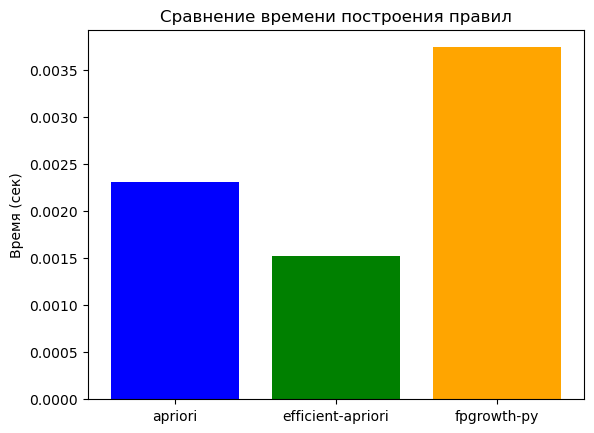

In [125]:
plt.bar(times.keys(), times.values(), color=['blue', 'green', 'orange'])
plt.ylabel("Время (сек)")
plt.title("Сравнение времени построения правил")
plt.show()